# Task 02

## Installing scikit-fuzzy

In [1]:
!pip install scikit-fuzzy

## Imports

In [0]:
import sklearn
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

## Generating Data
Firstly generate 400 2D data points using normal Gaussian Distribution. Please note that the value of sigma should lie between 0 to 1.5. Also plot the data points for better visualization. Initially you may assume that your data has to be plotted in the form of three clusters.

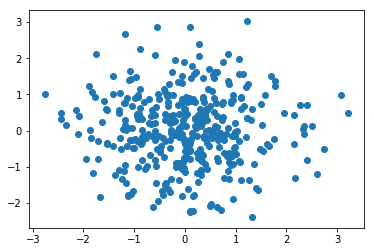

In [3]:
xPoints = []
yPoints = []
dataPoints = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 400)
for i in range(len(dataPoints)):
	xPoints.append(dataPoints[i][0])
	yPoints.append(dataPoints[i][1])

assert len(xPoints) == len(yPoints)
plt.scatter(xPoints, yPoints)

In traditional clustering algorithms the issue at hand is always how to find out number of clusters which is never pre-defined. In this scenario you have to try to cluster your data many times to get a better intuition (may be five or 
six different times).

Text(0.5, 1.0, 'TEST DATA')

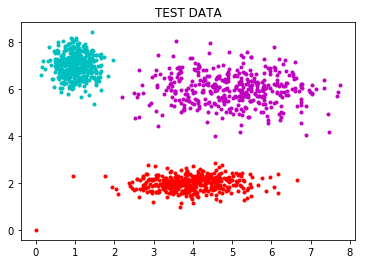

In [4]:
# Some Random Colors
colors = ['r', 'c', 'm', 'y', 'b', 'orange', 'g', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers and cluster sigmas (in x and y respectively)
centers = [[4, 2], [1, 7], [5, 6]]
sigmas = [[0.8, 0.3], [0.3, 0.5], [1.1, 0.7]]

# Generate test data
np.random.seed(50)
xPoints = np.zeros(1)
yPoints = np.zeros(1)
labels = np.zeros(1)
for i, ((x_mu, y_mu), (x_sigma, y_sigma)) in enumerate(zip(centers, sigmas)):
    xPoints = np.hstack((xPoints, np.random.standard_normal(400) * x_sigma + x_mu))
    yPoints = np.hstack((yPoints, np.random.standard_normal(400) * y_sigma + y_mu))
    labels = np.hstack((labels, np.ones(400) * i))

# Visualization
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xPoints[labels==label], yPoints[labels==label], '.', color=colors[label])
ax0.set_title('TEST DATA')

## Clustering Visualization
See how the different distribution of data is adopted by the clusters specified.
Note: with each photo a new cluster is introduced.

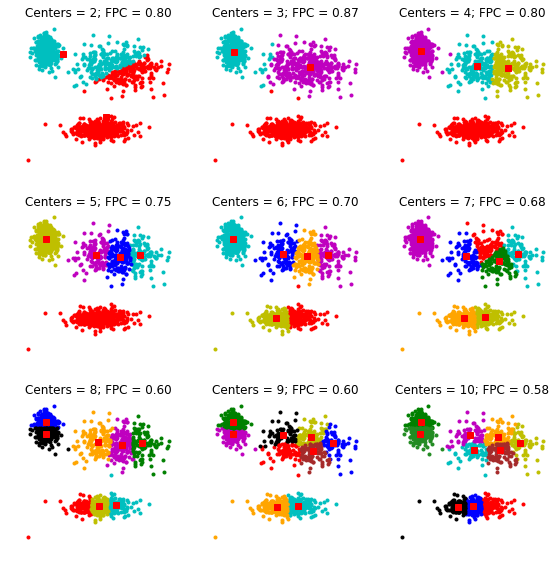

In [5]:
fig1, ax1 = plt.subplots(3, 3, figsize=(8, 8))

data = np.vstack((xPoints, yPoints))
fpcs = []

for cen_i, ax in enumerate(ax1.reshape(-1), 2):
    cen, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data, cen_i, 2, error=0.005, maxiter=1000, init=None)
    fpcs.append(fpc)        # append

    # Plot assigned clusters, for each data point in training set
    cluster = np.argmax(u, axis=0)
    for j in range(cen_i):
        ax.plot(xPoints[cluster==j], yPoints[cluster==j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cen:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(cen_i, fpc))
    ax.axis('off')
    
fig1.tight_layout()

## Show a 3 Cluster Model

Generate Random Data and then show a 3 Cluster model of the data.

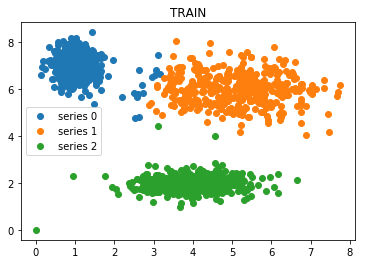

In [6]:
cen, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(data, 3, 2, error=0.005, maxiter=1000)

# 3-cluster model
fig2, ax2 = plt.subplots()
ax2.set_title('TRAIN')
for j in range(3):
    ax2.plot(data[0, u_orig.argmax(axis=0) == j], data[1, u_orig.argmax(axis=0) == j], 'o', label='series ' + str(j))
ax2.legend()

## K-Means Clustering

First Generate uniformly sampled data spread across the range [0, 10] in x and y. And then predict new cluster membership with `cmeans_predict` as well as `cen` from the 3-cluster model. Then Plot the Data and Help visualize the K-Means Clustering Algorithm doing its magic.

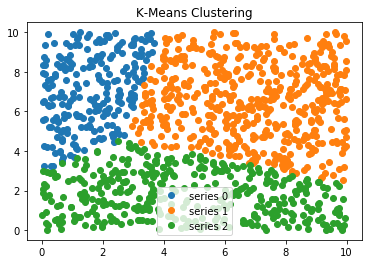

In [7]:
# Generate Data
data_new = np.random.uniform(0, 1, (1100, 2)) * 10
# Prediction
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(data_new.T, cen, 2, error=0.005, maxiter=1000)

cluster = np.argmax(u, axis=0)
fig3, ax3 = plt.subplots()
ax3.set_title('K-Means Clustering')

for j in range(3):
    ax3.plot(data_new[cluster == j, 0], data_new[cluster == j, 1], 'o', label='series ' + str(j))
ax3.legend()
plt.show()